<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:36: SyntaxWarning: invalid escape sequence '\o'
C:\Users\niele\AppData\Local\Temp\ipykernel_7072\2495821591.py:36: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, x, label='$x(t): \omega_d = {:.2f}$ '.format(omega_d))


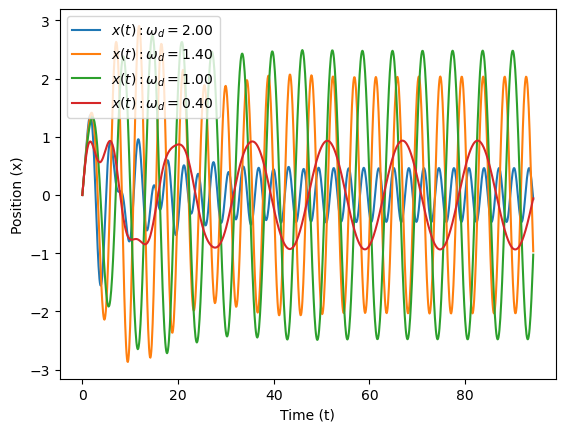

In [52]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Driven, damped harmonic oscillator function
def driven_pendulum(t, y, b, omega0, omega_d, A):
    x, v = y
    dxdt = v
    dvdt = -b * v - (omega0 ** 2) * x + A * np.sin(omega_d * t)
    return [dxdt, dvdt]

# Function to run the simulation for different driving frequencies
def loop_through(omega, b, tf, y0, A):
    plt.figure()

    # Loop through three driving frequencies (100%, 90%, 50% of omega0)
    for omega_d in [2, 1.4, 1, 0.4]:
        # Call the solver for this omega_d
        result = integrate.solve_ivp(
            fun=driven_pendulum,
            t_span=(0, tf),
            y0=y0,
            args=(b, omega, omega_d, A),  # Pass the parameters
            method="RK45",
            t_eval=np.linspace(0, tf, 1001)
        )

        # Read the solution from the result
        t = result.t
        x, v = result.y

        # Plot the result x(t) for this run
        plt.plot(t, x, label='$x(t): \omega_d = {:.2f}$ '.format(omega_d))

    # Finalize the plot
    plt.legend()  # Make the plot labels visible
    plt.xlabel('Time (t)')
    plt.ylabel('Position (x)')
    plt.savefig('Oscillator-driven-multi.pdf', bbox_inches='tight')
    plt.show()

# Main parameters for simulation
x0 = 0   # initial position
v0 = 1   # initial velocity
y0 = [x0, v0]  # initial state (position and velocity)
t0 = 0   # initial time

# System properties
b = 0.2    # damping coefficient
omega0 = 1.2  # natural frequency of the oscillator
A = 1.2       # amplitude of the driving force
tf = 30*np.pi     # final time for the simulation

# Run the function that loops through different driving frequencies
loop_through(omega0, b, tf, y0, A)
